# Project Title:  "Comprehensive Exploratory Data Analysis of Laptop Pricing and Specifications"

#### Perform an Exploratory Data Analysis (EDA) on a comprehensive laptop dataset to uncover patterns, trends, and relationships influencing laptop prices. Using Python libraries such as Pandas, Matplotlib, and Seaborn, analyze key hardware specifications, brand, operating system, and display features. Visualize distributions and correlations through histograms, boxplots, scatterplots, heatmaps, and pairplots. Summarize findings with observations and actionable business insights to support data-driven decision-making for manufacturers and retailers.



## Step1:ImportLibraries

In [12]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns




 ## Step2:LoadDataset

In [13]:
# Load the dataset
df = pd.read_csv(r"C:\DSAI study materials\Job Hunt\Unified Mentor Internship\Laptop Price Analysis project\laptop_prices.csv")  

# Display the first 5 rows
df.head()


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


Information related to data

In [14]:
# Shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# View column names and data types
df.info()




Dataset shape: (1275, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 


Step3:Data Cleaning


In [15]:
# Check missing values
df.isnull().sum()


Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [16]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Show a few duplicate rows (if any)
duplicate_rows.head()


Number of duplicate rows: 0


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model


In [17]:
df.describe() # Statistical summary of the dataset

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [18]:
company_counts = df['Company'].value_counts()
print(company_counts)# Plotting the distribution of laptop companies

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64


## Step 4: Exploratory Data Analysis (EDA)

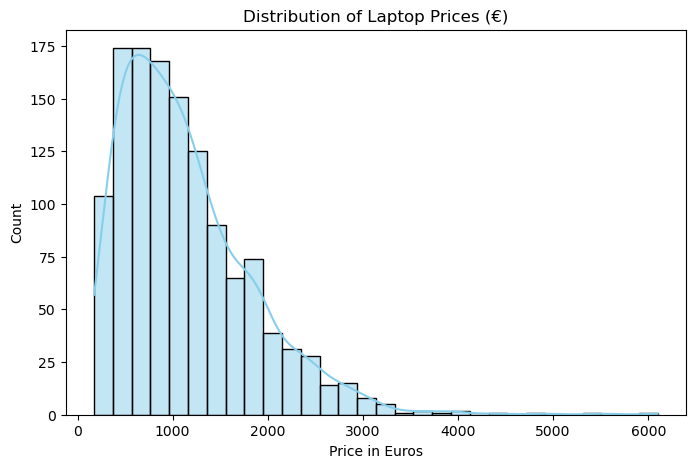

In [19]:
# Distribution of Target Variable (Price)
plt.figure(figsize=(8, 5))
sns.histplot(df['Price_euros'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Laptop Prices (€)")
plt.xlabel("Price in Euros")
plt.ylabel("Count")
plt.show()


Observation:
Most laptop prices range between €400 and €2000, with a clear concentration in the mid-range segment. The distribution is right-skewed, with a few premium models priced as high as €6000, though these high-end laptops appear very infrequently in the dataset.

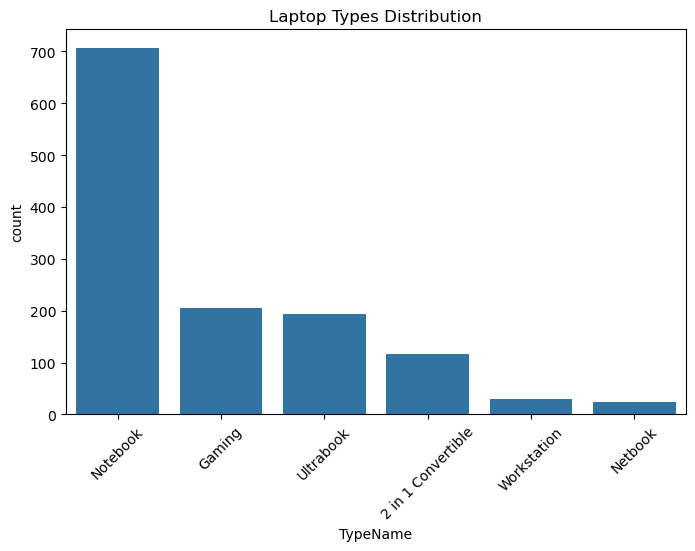

In [20]:
# Laptop Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TypeName', order=df['TypeName'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Laptop Types Distribution")
plt.show()


Observation:
The most common laptop type in the dataset is Notebook, followed by Gaming laptops, then Ultrabook models. 2 in 1 Convertible devices come next, while other types like Workstation and Netbook appear far less frequently, indicating limited market representation.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\3651070004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Company', order=df['Company'].value_counts().index, palette="Set2")


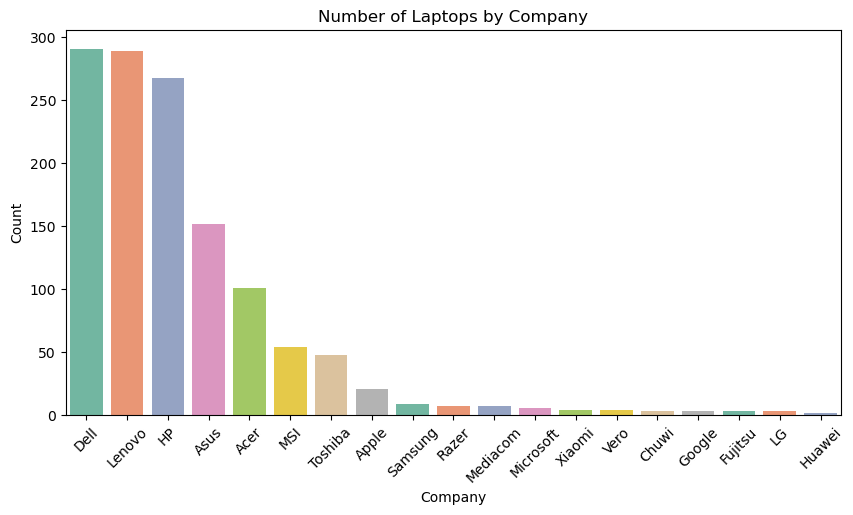

In [21]:
# Number of Laptops by Company
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Company', order=df['Company'].value_counts().index, palette="Set2")
plt.title("Number of Laptops by Company")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Observation:
Dell, Lenovo, and HP have the highest number of laptops in the dataset, indicating their strong presence in the market. Brands like Asus, Acer, and MSI also have notable counts, while premium brands such as Apple, Microsoft, and Razer appear less frequently, reflecting their smaller but potentially higher-margin market share.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\3986239420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='OS', order=df['OS'].value_counts().index, palette='Set3')


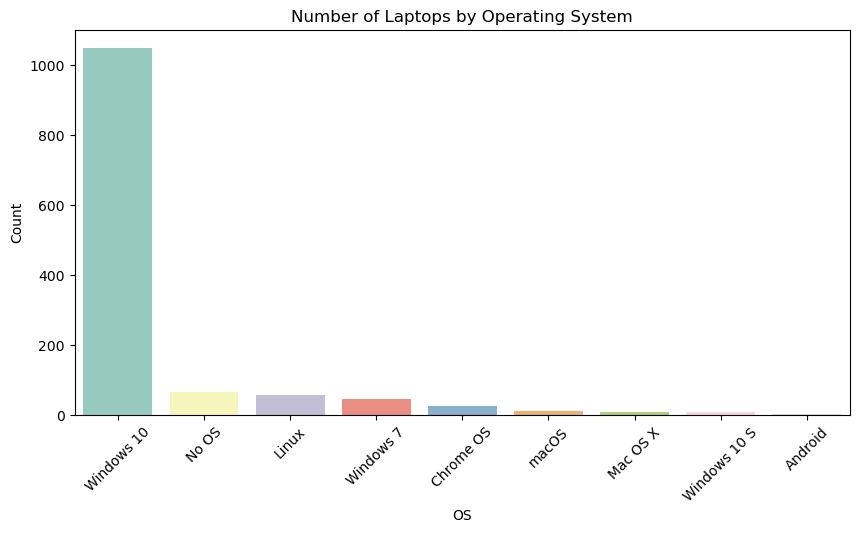

In [22]:
# Number of Laptops by Operating System
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='OS', order=df['OS'].value_counts().index, palette='Set3')
plt.title("Number of Laptops by Operating System")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Observation:
The most common operating system in the dataset is Windows 10, followed by laptops with No OS pre-installed. Linux and Windows 7 come next, while Chrome OS and MacOS appear least frequently, indicating they have a smaller share in the dataset.

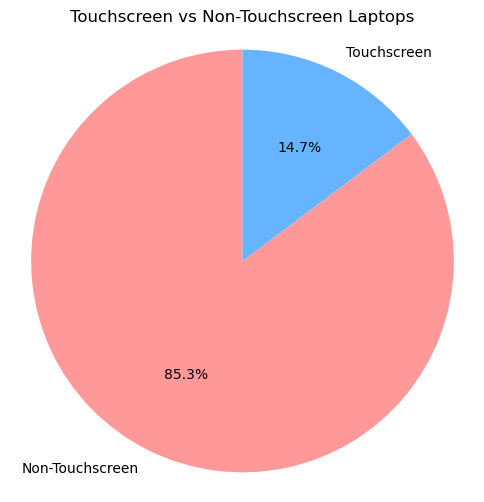

In [23]:
# Touchscreen Distribution by pie chart
# Count values
touch_counts = df['Touchscreen'].value_counts()

# Labels for the pie chart
labels = ['Non-Touchscreen', 'Touchscreen']

# Colors for the pie chart
colors = ['#ff9999', '#66b3ff']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(touch_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Touchscreen vs Non-Touchscreen Laptops')
plt.axis('equal')  # Equal aspect ratio to ensure it's a perfect circle
plt.show()


Observation:
The majority of laptops in the dataset are non-touchscreen models (85.3%), while touchscreen laptops make up only 14.7%. This suggests that touchscreen functionality is still a niche feature compared to traditional non-touchscreen designs.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\2052286524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ram', palette='Set1')


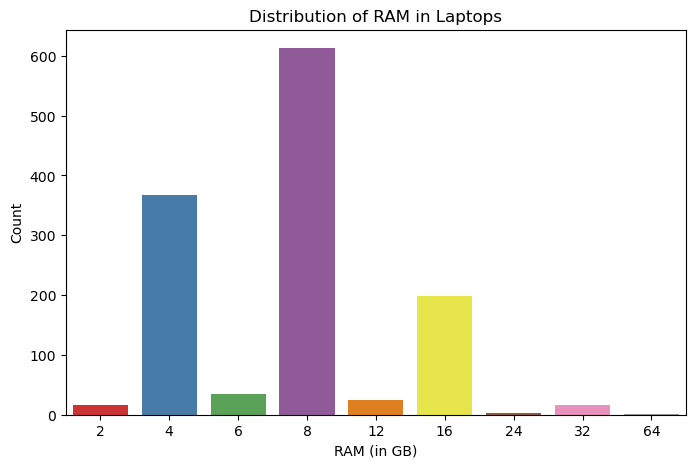

In [24]:
# Plot based of Ram
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Ram', palette='Set1')
plt.title("Distribution of RAM in Laptops")
plt.xlabel("RAM (in GB)")
plt.ylabel("Count")
plt.show()

Observation:
Laptops with 8GB RAM are the most common in the dataset, followed by 4GB and 16GB configurations. Higher-capacity models such as 32GB and 64GB RAM are rare, indicating they are typically found in premium or specialized laptops. The distribution suggests that mid-range RAM capacities dominate the market.

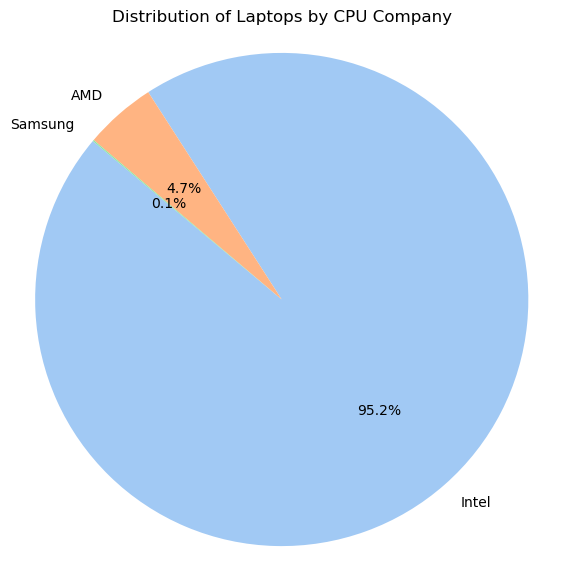

In [25]:
# CPU Distribution
# Count the number of laptops by CPU company
cpu_counts = df['CPU_company'].value_counts()

# Plot
plt.figure(figsize=(7, 7))
plt.pie(cpu_counts, labels=cpu_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Laptops by CPU Company')
plt.axis('equal')  # Keep pie chart as a circle
plt.show()


Observation:
The majority of laptops in the dataset use Intel processors, accounting for the dominant share. AMD holds a smaller but notable portion of the market, while Samsung and other CPU manufacturers contribute only a very small fraction, indicating limited representation in the dataset.

In [26]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


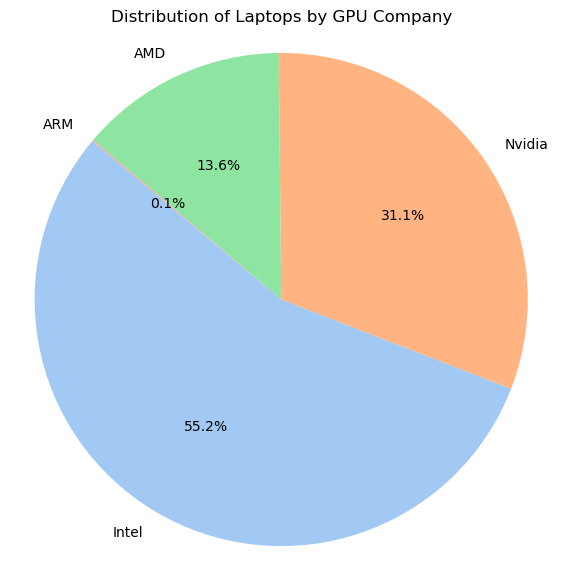

In [27]:
# Count the number of laptops by GPU company
gpu_counts = df['GPU_company'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(gpu_counts, labels=gpu_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Laptops by GPU Company')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()


Observation:
The majority of laptops in the dataset feature Intel GPUs, followed by Nvidia graphics cards. AMD GPUs come next, while ARM graphics have the smallest share, indicating limited use in laptops compared to the dominant Intel and Nvidia offerings.

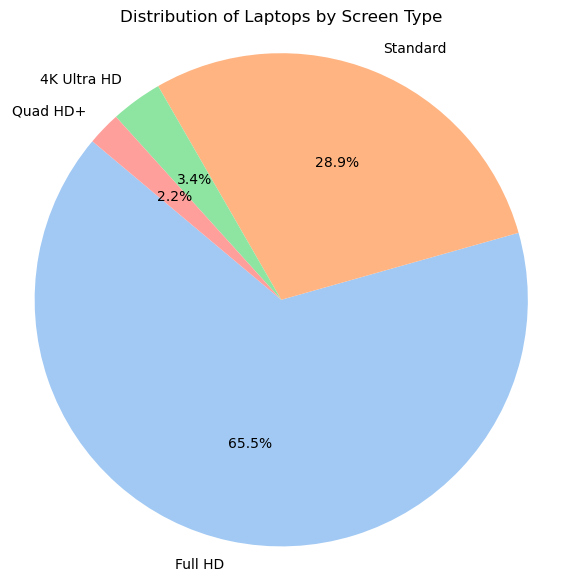

In [28]:
# Count the number of laptops by screen type
screen_counts = df['Screen'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(screen_counts, labels=screen_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Laptops by Screen Type')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()


Observation:
The most common screen type in the dataset is Full HD, followed by Standard displays. Higher-resolution options such as 4K Ultra HD and Quad HD+ are less frequent, indicating that while premium screen technologies are available, most laptops stick to standard Full HD panels.

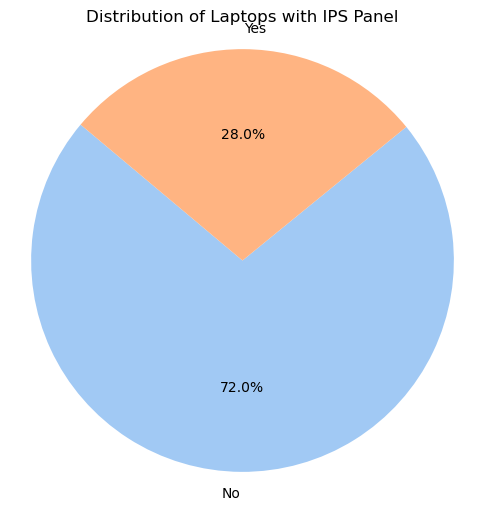

In [29]:
# Count the number of laptops with and without IPS panel
ips_counts = df['IPSpanel'].value_counts()

# Labels
labels = ['No', 'Yes']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(ips_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Laptops with IPS Panel')
plt.axis('equal')  # Keep chart circular
plt.show()


Observation:
The majority of laptops in the dataset do not feature an IPS panel, while a smaller proportion are equipped with IPS technology. This suggests that although IPS panels offer better color accuracy and viewing angles, they are less common compared to standard display types.

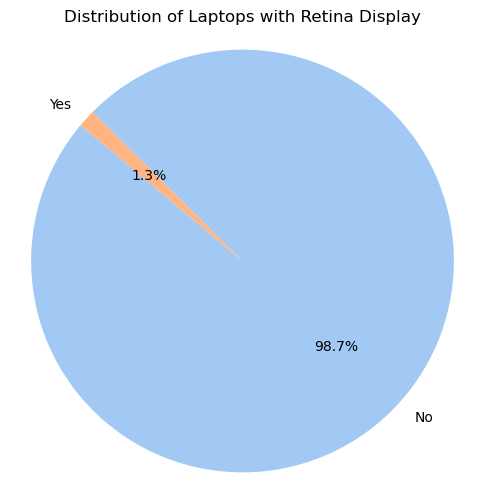

In [30]:
# Count the number of laptops with and without Retina display
retina_counts = df['RetinaDisplay'].value_counts()

# Labels
labels = ['No', 'Yes']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(retina_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Laptops with Retina Display')
plt.axis('equal')  # Keep chart circular
plt.show()


Observation:
Most laptops in the dataset do not feature a Retina display, while only a small proportion have it. This indicates that Retina display technology is a niche feature, likely concentrated in specific high-end models, such as those from Apple.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\649812639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Inches', palette='Set2', order=sorted(df['Inches'].unique()))


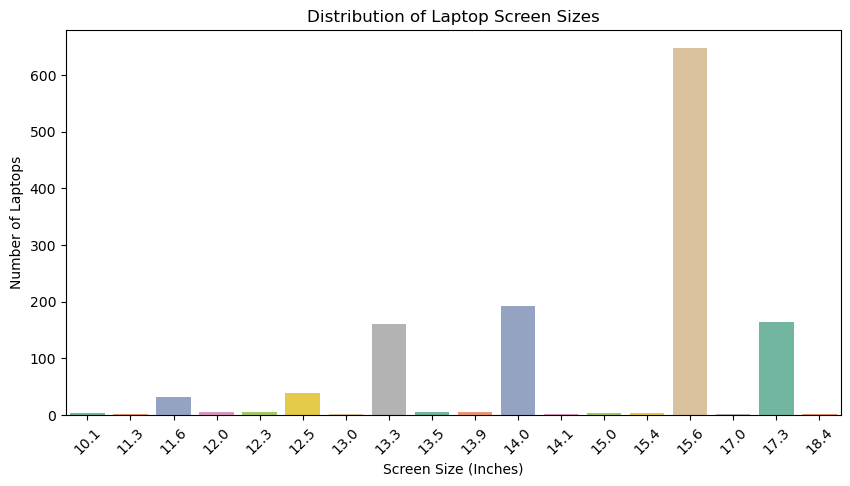

In [31]:
# Distribution of Laptop Screen Sizes
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Inches', palette='Set2', order=sorted(df['Inches'].unique()))
plt.title('Distribution of Laptop Screen Sizes')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)
plt.show()


Observation:
The most common laptop screen size in the dataset is 15.6 inches, followed by 14 inches, 13.3 inches, and 17.3 inches. Smaller and larger sizes outside these ranges appear less frequently, suggesting that mid-sized screens are the most popular choice among laptop models.

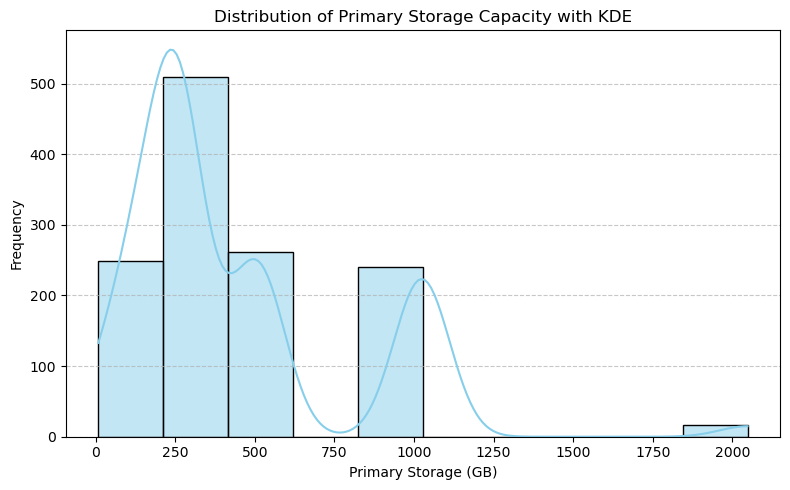

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='PrimaryStorage',
    kde=True,
    bins=10,
    color='skyblue'
)
plt.title('Distribution of Primary Storage Capacity with KDE')
plt.xlabel('Primary Storage (GB)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Observation:
Primary storage capacities between 128GB and 500GB are the most common in the dataset, with 256GB and 512GB being particularly frequent. These are followed by 1TB configurations, while very small or very large capacities such as 64GB or 2TB are rare. This indicates that mid-range storage sizes are the preferred choice in most laptop models.



C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\3523061361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PrimaryStorage', palette='Set1', order=sorted(df['PrimaryStorage'].unique()))


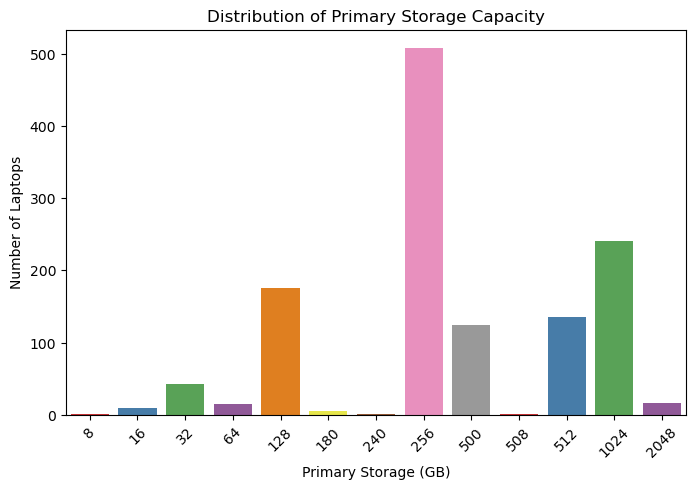

In [33]:
# Distribution of Primary Storage Capacity
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PrimaryStorage', palette='Set1', order=sorted(df['PrimaryStorage'].unique()))
plt.title('Distribution of Primary Storage Capacity')
plt.xlabel('Primary Storage (GB)')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)
plt.show()


Observation:
The most common primary storage capacity in the dataset is 256GB, followed by 1024GB (1TB). Other frequent capacities include 128GB, 512GB, and 500GB, while smaller capacities like 32GB and larger capacities such as 2048GB (2TB) appear rarely. This suggests that while 1TB remains popular for high-storage needs, mid-range options like 256GB dominate the laptop market.

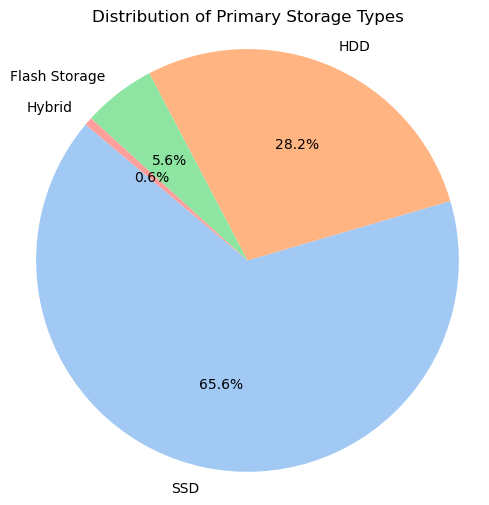

In [34]:
# Count the number of each primary storage type
primary_storage_counts = df['PrimaryStorageType'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(primary_storage_counts, labels=primary_storage_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Primary Storage Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


Insight:
The majority of laptops use SSD as the primary storage type, followed by HDD. Flash storage and hybrid drives account for a smaller proportion of devices.

Business Implication:
The dominance of SSDs highlights a market preference for faster performance and durability over lower-cost, high-capacity HDDs. Manufacturers and retailers should prioritize SSD-equipped models in marketing and inventory planning while offering HDD-based options mainly for budget-conscious consumers or storage-heavy use cases.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\2199013301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SecondaryStorage', palette='Set1', order=sorted(df['SecondaryStorage'].unique()))


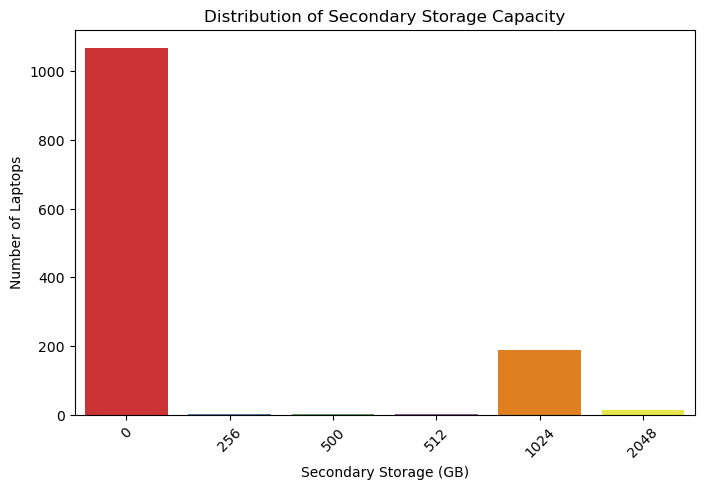

In [35]:
# Distribution of Secondary Storage Capacity
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SecondaryStorage', palette='Set1', order=sorted(df['SecondaryStorage'].unique()))
plt.title('Distribution of Secondary Storage Capacity')
plt.xlabel('Secondary Storage (GB)')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)
plt.show()


Insight: Most laptops in the dataset do not have any secondary storage. Among those that do, the most common capacities are 1024 GB and 2048 GB, indicating that when secondary storage is included, it tends to be relatively high capacity.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\725199176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SecondaryStorageType', palette='Set2', order=df['SecondaryStorageType'].value_counts().index)


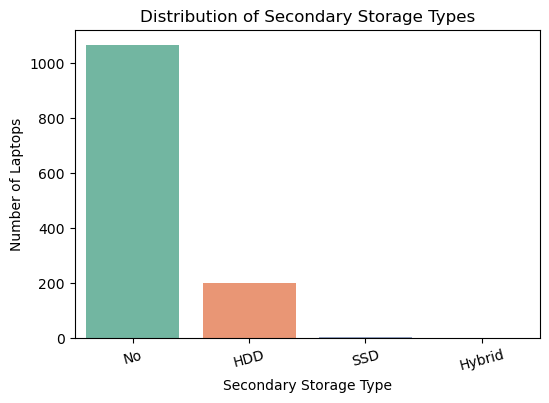

In [36]:
# Count the number of laptops by secondary storage type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SecondaryStorageType', palette='Set2', order=df['SecondaryStorageType'].value_counts().index)
plt.title('Distribution of Secondary Storage Types')
plt.xlabel('Secondary Storage Type')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=15)
plt.show()


Observation: The majority of laptops in the dataset do not have secondary storage. Among those equipped with it, HDD is the most common type, followed by SSD. Hybrid storage options are rare.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\2174609035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values, palette='Set3')


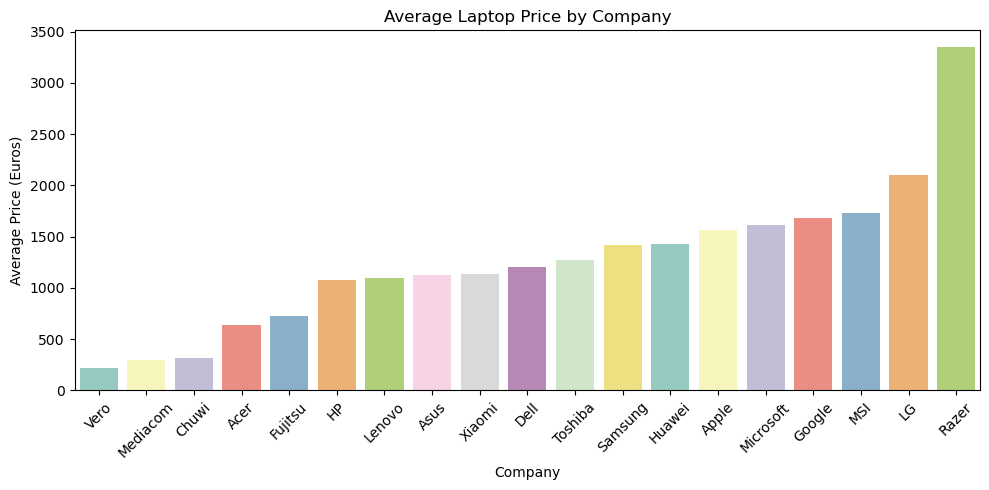

In [37]:
# Average Price by Company
plt.figure(figsize=(10, 5))
avg_price_by_company = df.groupby('Company')['Price_euros'].mean().sort_values()

sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values, palette='Set3')
plt.title('Average Laptop Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price (Euros)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The analysis of the average laptop price by company shows that Razer stands out with the highest average price, reflecting its focus on premium, gaming-oriented devices. LG and Google also command high prices, indicating their positioning in the high-end or niche laptop market. On the other hand, brands like Vero, Chuwi, and Mediacom offer the most affordable laptops, targeting budget-conscious consumers. Most other brands fall within the mid-range price segment, suggesting they aim to strike a balance between performance, features, and affordability.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\3820059836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Company', y='Price_euros', palette='Set3')


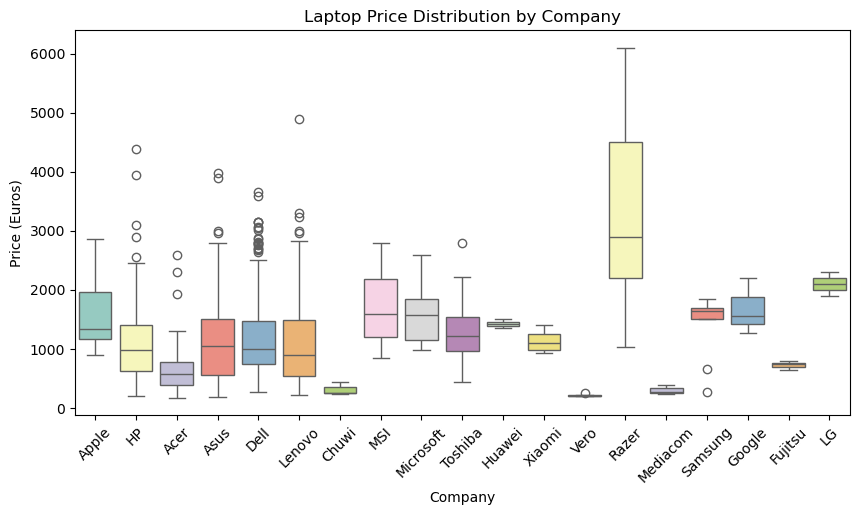

In [38]:
    # Boxplot of Laptop Prices by Company   
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='Company', y='Price_euros', palette='Set3')
    plt.title('Laptop Price Distribution by Company')
    plt.ylabel('Price (Euros)')
    plt.xlabel('Company')
    plt.xticks(rotation=45)
    plt.show()


From the boxplot of laptop prices by company, it is clear that there is a significant variation in pricing strategies among brands.
Razer shows the highest median and overall price range, reinforcing its premium gaming and high-performance market positioning.
Brands like LG and Google also have consistently higher prices, targeting high-end consumers.
In contrast, companies such as Vero, Chuwi, and Mediacom maintain much lower price ranges, catering to budget buyers.
Some brands, like Apple and MSI, show narrower but high-positioned distributions, reflecting consistent premium pricing, while others like HP and Dell exhibit wider price spreads, indicating a mix of budget and high-end models in their lineup.


C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\1824700332.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_os.index, y=avg_price_os.values, palette='muted')


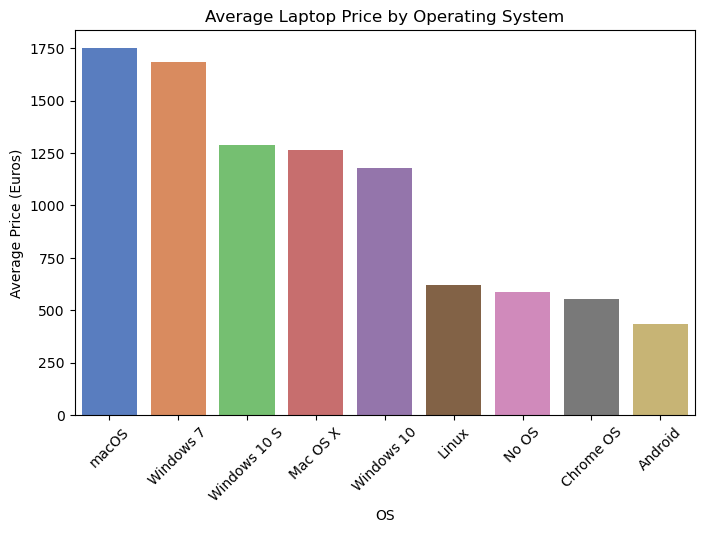

In [39]:
    # Average Laptop Price by Operating System
    avg_price_os = df.groupby('OS')['Price_euros'].mean().sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=avg_price_os.index, y=avg_price_os.values, palette='muted')
    plt.title('Average Laptop Price by Operating System')
    plt.ylabel('Average Price (Euros)')
    plt.xticks(rotation=45)
    plt.show()


Insight:
Mac OS laptops have the highest average prices, reflecting Apple’s premium market positioning and brand value. Windows 7 devices, despite being outdated, still appear expensive due to their presence in older but originally high-spec models. Windows 10 S follows, likely because of certain newer ultrabooks and education-focused devices. Linux, Chrome OS, and “No OS” options remain in the lower price brackets, appealing to budget-conscious consumers or niche technical users.

Business Impact:
For sellers, Mac OS devices offer the highest profit margins, but cater to a smaller premium segment. Windows 10 S and mid-tier OS laptops can target a wider audience with balanced pricing, while Linux/Chrome OS devices can be positioned as affordable entry-level options to capture price-sensitive markets.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\1139265281.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Screen', y='Price_euros', hue='Touchscreen', ci=None, palette='Set2')


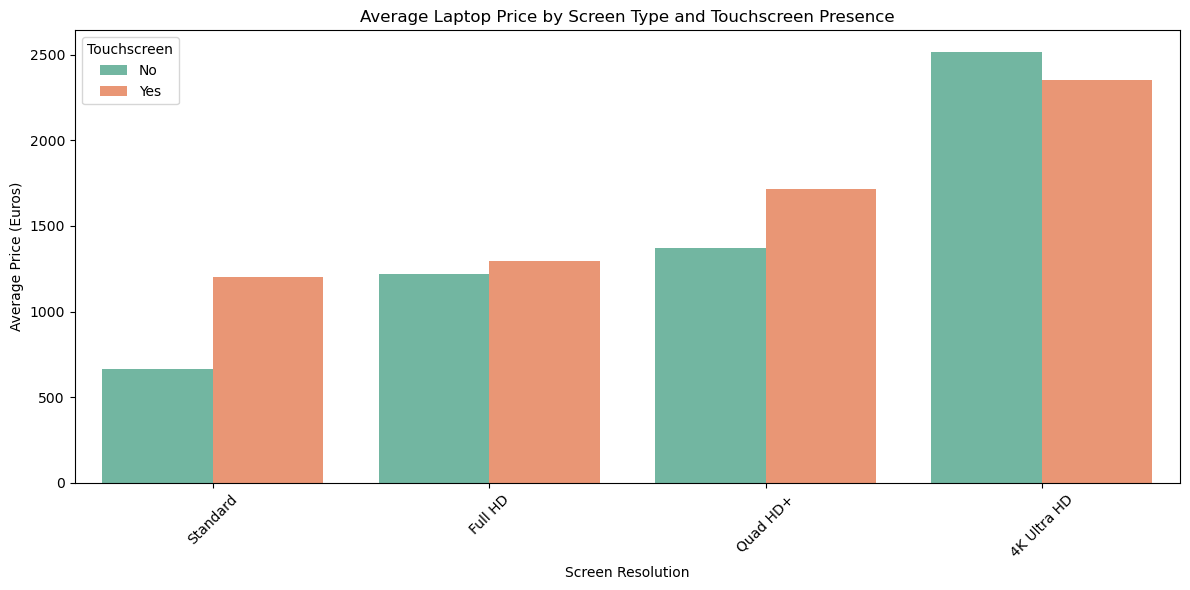

In [40]:
# Average Laptop Price by Screen Type and Touchscreen Presence
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Screen', y='Price_euros', hue='Touchscreen', ci=None, palette='Set2')
plt.title('Average Laptop Price by Screen Type and Touchscreen Presence')
plt.xlabel('Screen Resolution')
plt.ylabel('Average Price (Euros)')
plt.legend(title='Touchscreen', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight:
Laptops with higher-resolution screens, such as 4K Ultra HD and Quad HD+, generally command higher average prices compared to standard Full HD and Standard displays. Additionally, across nearly all screen types, touchscreen models tend to have a noticeably higher average price than their non-touchscreen counterparts. This indicates that both screen quality and touchscreen capability are premium features that increase the laptop’s price point.

Business Impact:
Manufacturers and retailers can leverage this by emphasizing touchscreen and high-resolution display options in their premium laptop lines, targeting consumers who value enhanced visual quality and interactivity. Meanwhile, budget models with standard displays and no touchscreen remain important for price-sensitive segments.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\1717721216.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='OS', y='Price_euros', hue='Touchscreen', palette='Set2', ci=None)


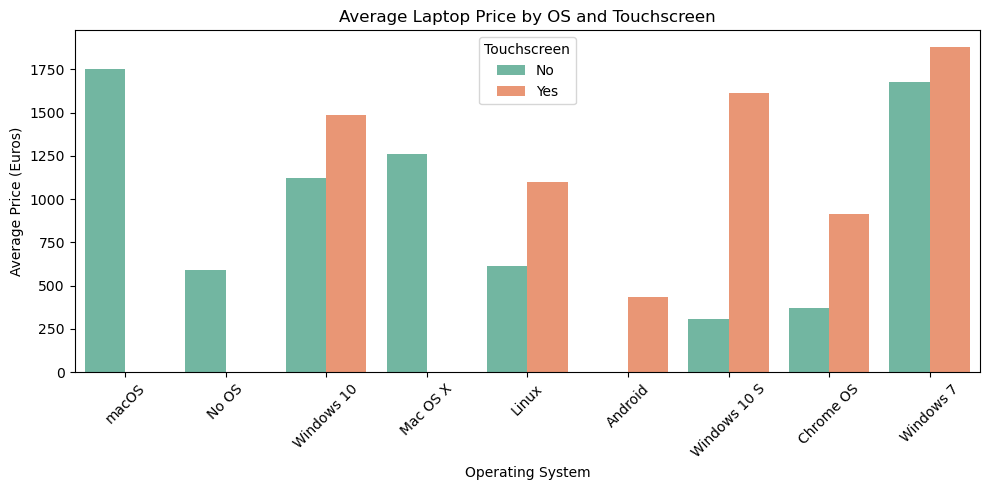

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='OS', y='Price_euros', hue='Touchscreen', palette='Set2', ci=None)

plt.title('Average Laptop Price by OS and Touchscreen')
plt.xlabel('Operating System')
plt.ylabel('Average Price (Euros)')
plt.xticks(rotation=45)
plt.legend(title='Touchscreen', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


Across all operating systems, laptops equipped with touchscreen functionality generally command higher average prices than their non-touchscreen counterparts. MacOS laptops remain the most expensive overall, regardless of touchscreen presence. For Windows 10 and Windows 7 devices, touchscreen models show a significant price premium, highlighting the added hardware costs and perceived value of this feature.

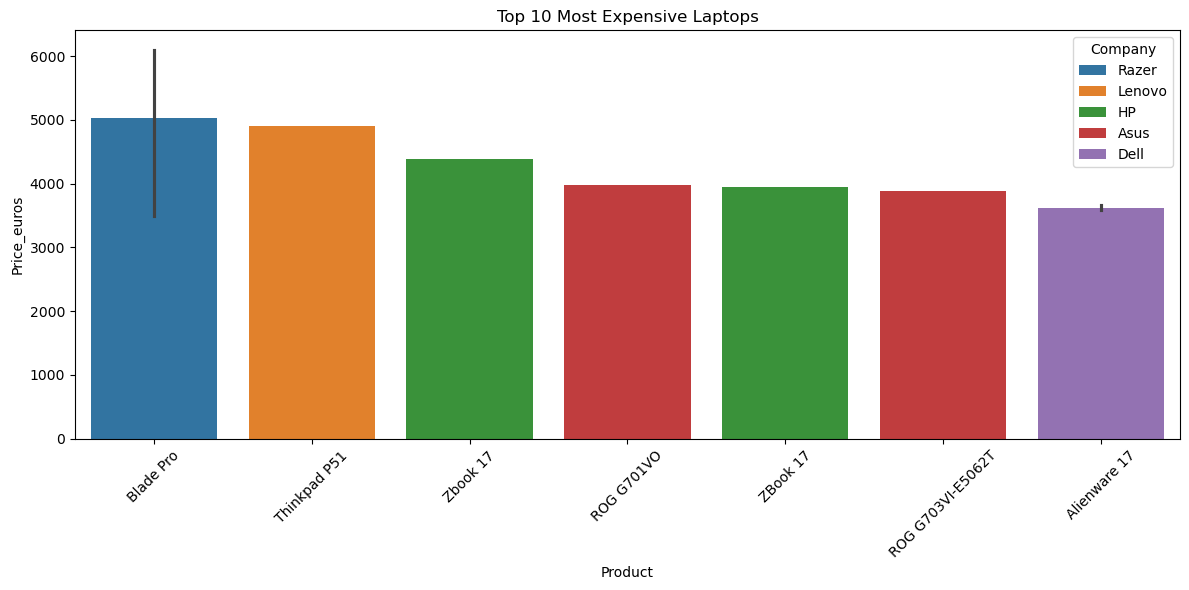

In [42]:
# Top 10 Most Expensive Laptops
top_products = df.nlargest(10, 'Price_euros')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Product', y='Price_euros', hue='Company', dodge=False)
plt.title('Top 10 Most Expensive Laptops')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The top 10 most expensive laptops in the dataset include models such as the Blade Pro, ThinkPad 51, ZBook 17, and ROG G701VO. These models are typically from premium brands like Razer, Lenovo, HP, and ASUS, highlighting their focus on high-performance, luxury, and gaming segments. Their high prices reflect advanced hardware, specialized features, and target users who demand top-tier performance.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\56444880.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='PrimaryStorageType', y='Price_euros', hue='SecondaryStorageType', ci=None)


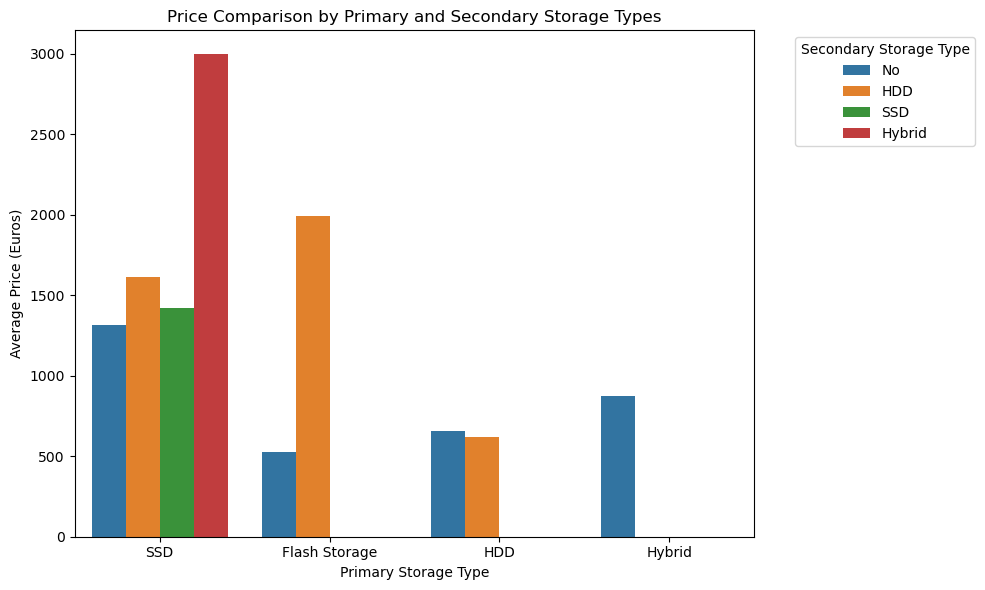

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='PrimaryStorageType', y='Price_euros', hue='SecondaryStorageType', ci=None)
plt.title('Price Comparison by Primary and Secondary Storage Types')
plt.ylabel('Average Price (Euros)')
plt.xlabel('Primary Storage Type')
plt.legend(title='Secondary Storage Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Laptops with SSD as primary storage combined with hybrid drives as secondary storage have the highest average prices among all storage configurations. This combination likely offers the benefits of fast performance from the SSD and large capacity or backup features from the hybrid drive, appealing to premium buyers. Other combinations, such as SSD with HDD or without secondary storage, generally show lower average prices. This underscores how advanced storage setups contribute to higher laptop pricing.

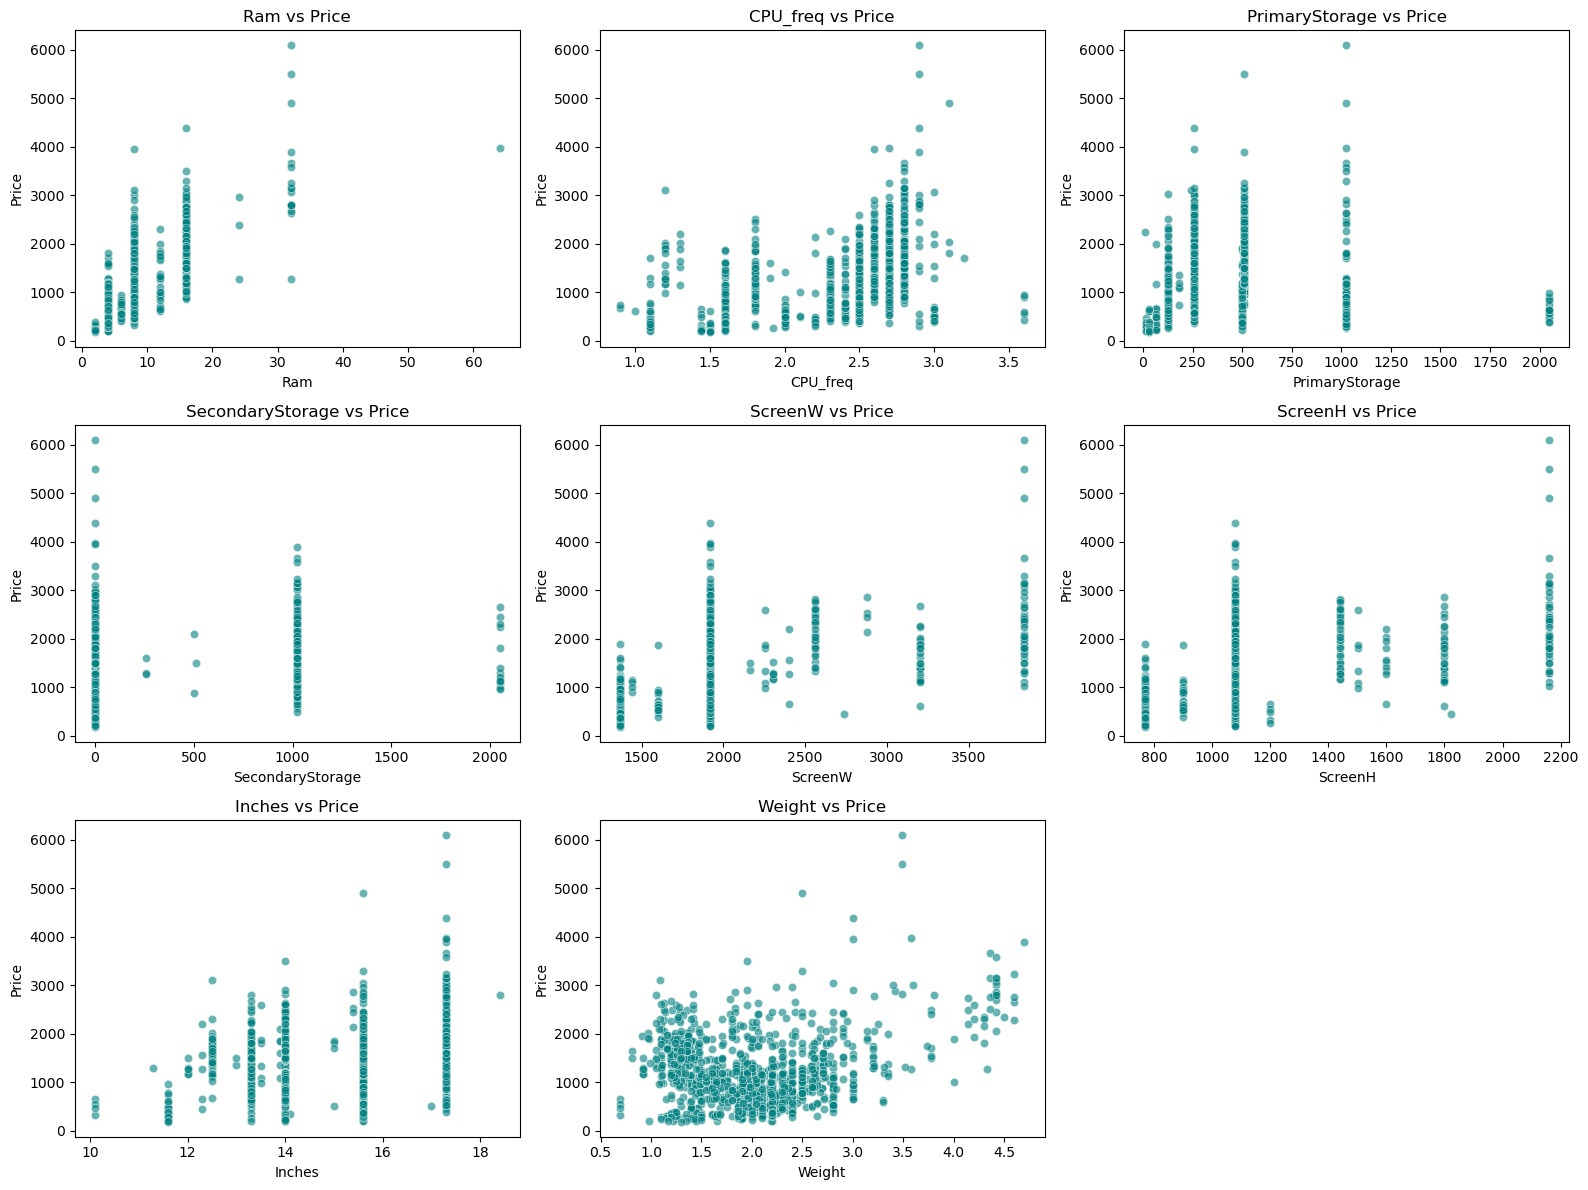

In [44]:
# Price vs Features

num_features = ['Ram', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage',
                'ScreenW', 'ScreenH', 'Inches', 'Weight']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(data=df, x=feature, y='Price_euros', alpha=0.6, color='teal')
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


The scatterplots reveal positive correlations between several numerical features and laptop price. Specifically:

RAM and CPU frequency show clear upward trends, indicating higher specifications tend to increase price.

Primary and secondary storage capacities also correlate with price, as larger storage options generally command higher prices.

Screen width, height, and size (inches) have a positive relationship with price, reflecting the premium placed on larger or higher-resolution displays.

Weight shows a weaker, less consistent relationship with price, suggesting that lighter or heavier laptops exist across different price ranges.

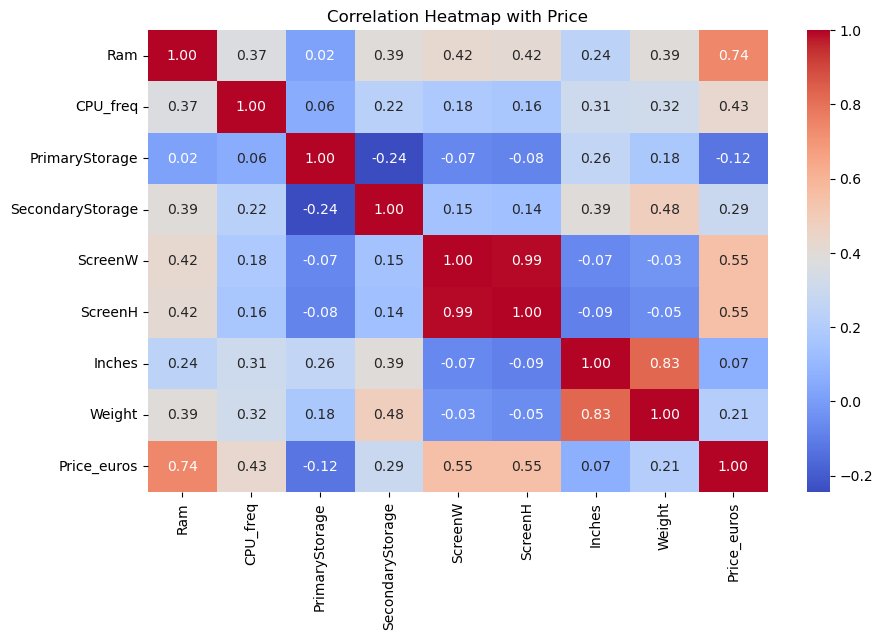

In [45]:
plt.figure(figsize=(10, 6))
corr = df[['Ram', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage',
           'ScreenW', 'ScreenH', 'Inches', 'Weight', 'Price_euros']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Price')
plt.show()


The heatmap shows that RAM and CPU frequency have the strongest positive correlations with laptop price, indicating that higher RAM and faster CPUs are associated with more expensive laptops. Interestingly, primary storage exhibits a slight negative correlation with price, possibly reflecting that larger or cheaper storage types don’t always lead to higher prices. Screen dimensions have a mild positive relationship with price, suggesting larger displays somewhat increase cost. Weight shows a weak positive correlation, indicating it has a minimal effect on laptop pricing.

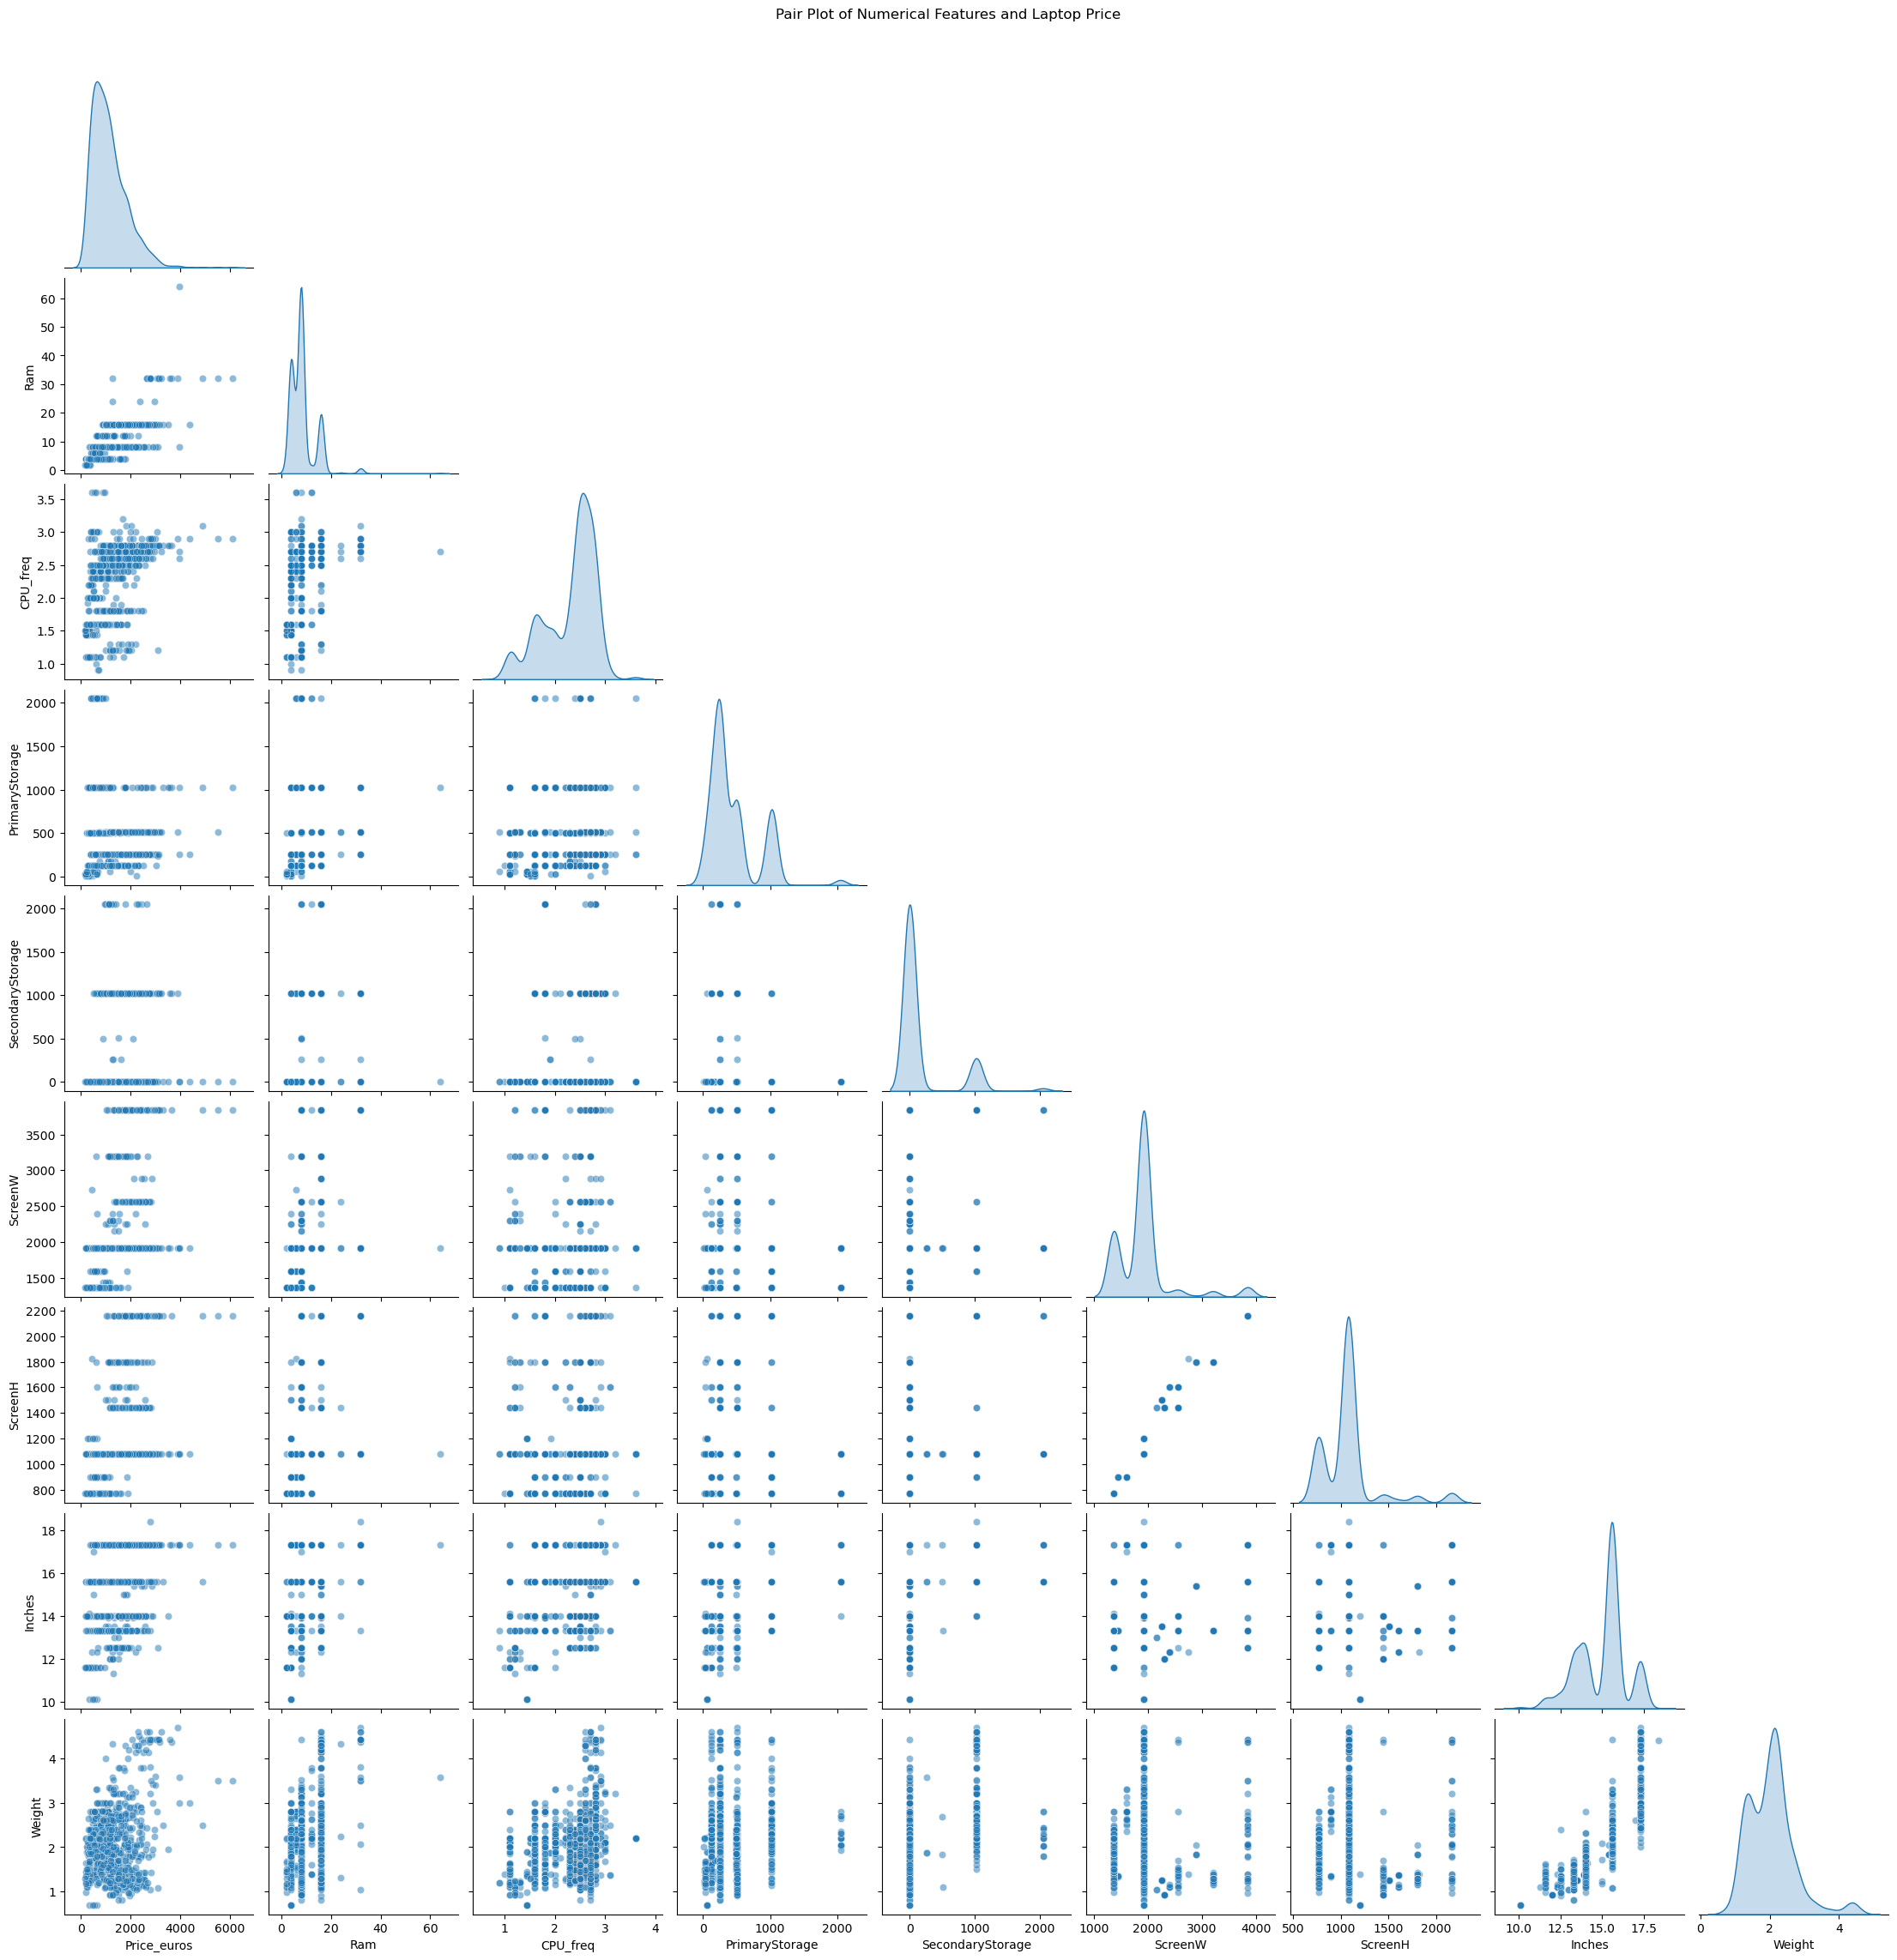

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select key numerical features
num_features = ['Price_euros', 'Ram', 'CPU_freq', 'PrimaryStorage', 
                'SecondaryStorage', 'ScreenW', 'ScreenH', 'Inches', 'Weight']

# Create pairplot
sns.pairplot(df[num_features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Numerical Features and Laptop Price', y=1.02)
plt.show()


The pairplot visualizes relationships among key numerical features and laptop price, reinforcing previous findings. Clear positive trends emerge between price and features like RAM and CPU frequency, indicating that higher specs correlate with higher prices. Some features, such as weight and primary storage, show weaker or more complex relationships with price. The diagonal KDE plots reveal the distribution shapes for each variable, highlighting skewness in storage capacities and price. Overall, the pairplot provides a comprehensive view of feature interactions and their influence on laptop pricing.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\122177115.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Ram', y='Price_euros', palette='Set1', ci=None)
C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\122177115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Ram', y='Price_euros', palette='Set1', ci=None)


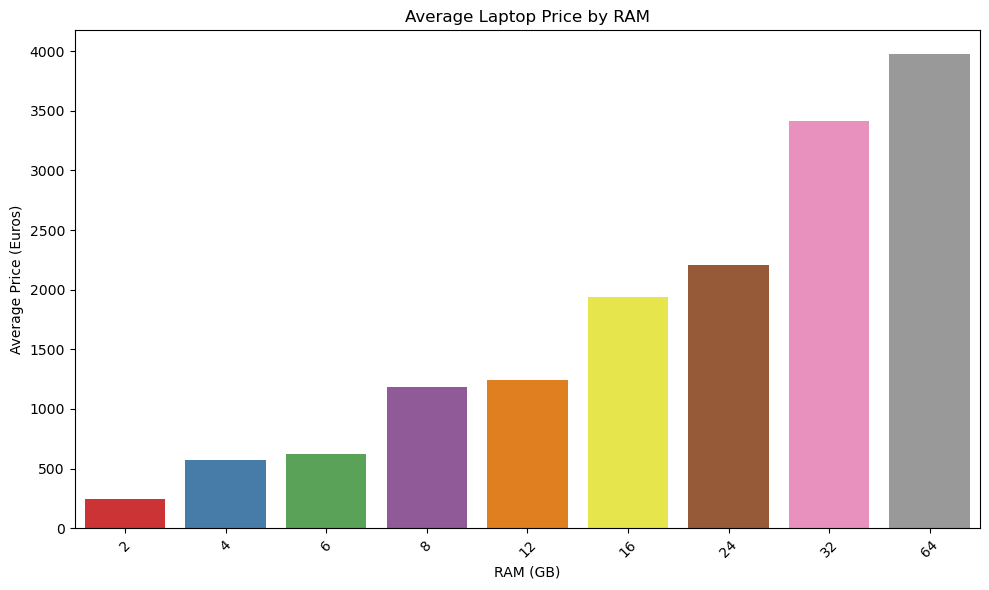

In [47]:
# Ram vs Price
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Ram', y='Price_euros', palette='Set1', ci=None)
plt.title('Average Laptop Price by RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Average Price (Euros)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The chart shows a clear upward trend in average laptop price as RAM increases. Models with lower RAM capacities are priced more affordably, while laptops equipped with higher RAM sizes—especially 16GB and above—command significantly higher prices. This indicates that RAM is a key factor influencing laptop cost, reflecting its importance in performance and multitasking capability.



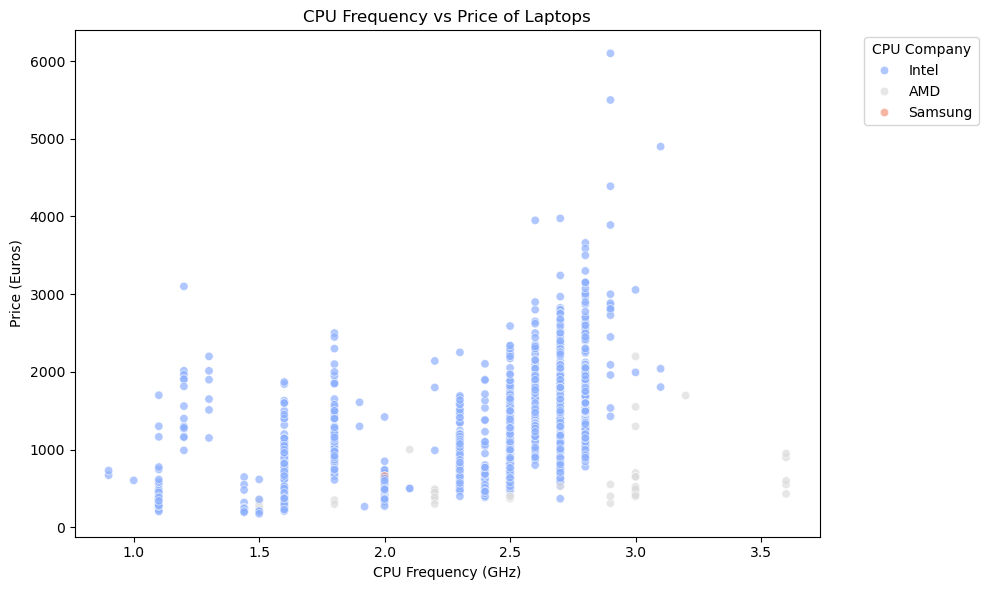

In [48]:
# cpu frequency vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CPU_freq', y='Price_euros', hue='CPU_company', palette='coolwarm', alpha=0.7)
plt.title('CPU Frequency vs Price of Laptops')
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('Price (Euros)')
plt.legend(title='CPU Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The scatterplot reveals a positive relationship between CPU frequency and laptop price, with higher-frequency CPUs generally associated with more expensive models. Additionally, laptops powered by Intel CPUs dominate the dataset, spanning a wide range of frequencies and prices. AMD CPUs also appear, often clustering at competitive frequencies and prices. This suggests that CPU performance, as indicated by frequency, plays a significant role in determining laptop price, and brand presence influences pricing patterns.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\4112110735.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='IPSpanel', y='Price_euros',hue ='RetinaDisplay'  ,palette='Set1', ci=None)


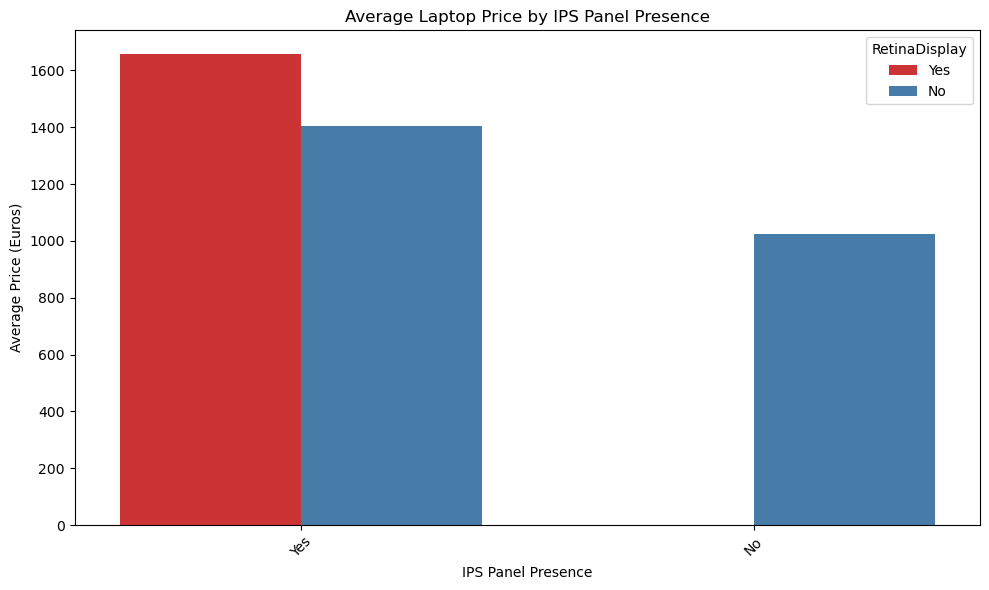

In [49]:
# Ips panel vs Price
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='IPSpanel', y='Price_euros',hue ='RetinaDisplay'  ,palette='Set1', ci=None)
plt.title('Average Laptop Price by IPS Panel Presence')
plt.xlabel('IPS Panel Presence')
plt.ylabel('Average Price (Euros)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Laptops with IPS panels tend to have higher average prices compared to those without, reflecting the premium for better display quality and wider viewing angles. Notably, Retina Displays appear exclusively in laptops equipped with IPS panels, and these models command the highest prices overall. This underscores that Retina technology is a high-end feature built upon IPS panels, significantly increasing the laptop’s value.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\2392686361.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='CPU_company', y='Price_euros', palette='Set1', ci=None)
C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\2392686361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='CPU_company', y='Price_euros', palette='Set1', ci=None)


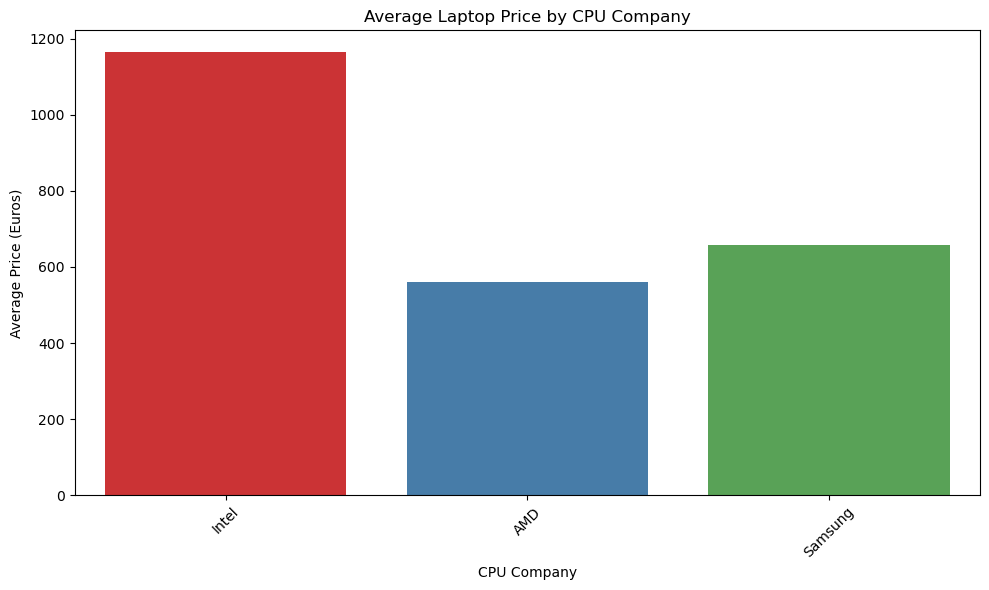

In [50]:
# CPU vs Price
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='CPU_company', y='Price_euros', palette='Set1', ci=None)
plt.title('Average Laptop Price by CPU Company')
plt.xlabel('CPU Company')
plt.ylabel('Average Price (Euros)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Laptops with Intel CPUs have the highest average prices, underscoring Intel’s dominance in premium segments. Interestingly, Samsung laptops come next in average price, positioned above AMD processors, which tend to be more affordable overall. This suggests Samsung’s laptops may focus on mid to high-end models, while AMD covers a broader range from budget to mid-tier. The CPU brand clearly impacts pricing and market positioning.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\2454840135.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='GPU_company', y='Price_euros', palette='Set1', ci=None)
C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\2454840135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='GPU_company', y='Price_euros', palette='Set1', ci=None)


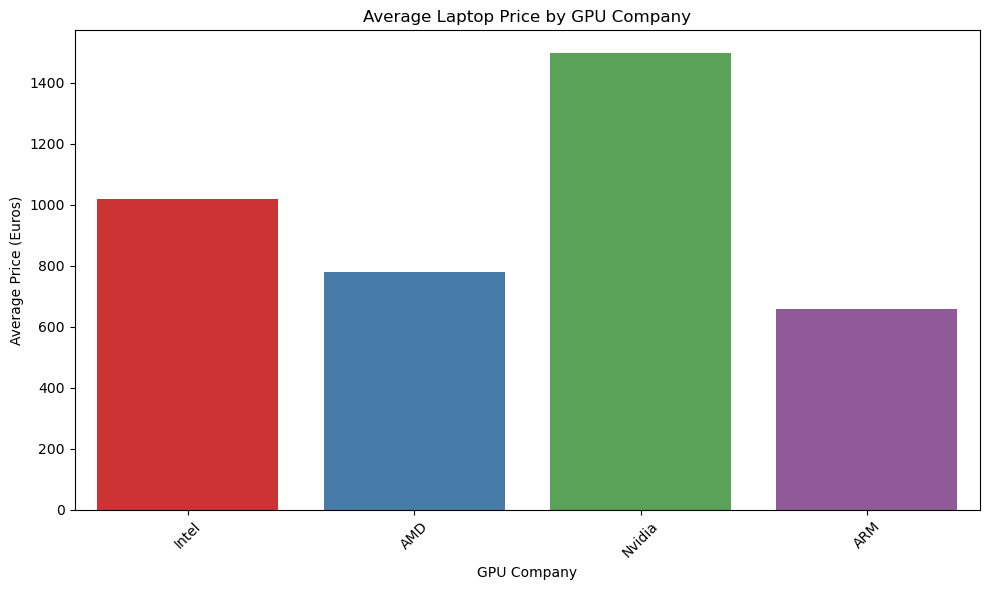

In [51]:
# GPU vs Price
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='GPU_company', y='Price_euros', palette='Set1', ci=None)
plt.title('Average Laptop Price by GPU Company')
plt.xlabel('GPU Company')
plt.ylabel('Average Price (Euros)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Laptops with Nvidia GPUs command the highest average prices, reflecting their premium and gaming market focus. Intel GPUs follow, mainly integrated graphics in mid-range laptops. AMD GPUs appear in more affordable or entry-level gaming models. Notably, ARM-based GPUs have the lowest average prices, indicating their use in budget-friendly or specialized low-power devices. This range highlights how GPU type strongly impacts laptop pricing and market segmentation.

C:\Users\dj005\AppData\Local\Temp\ipykernel_48132\1993326784.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='RetinaDisplay', y='Price_euros', hue='PrimaryStorage', palette='Set1', ci=None)


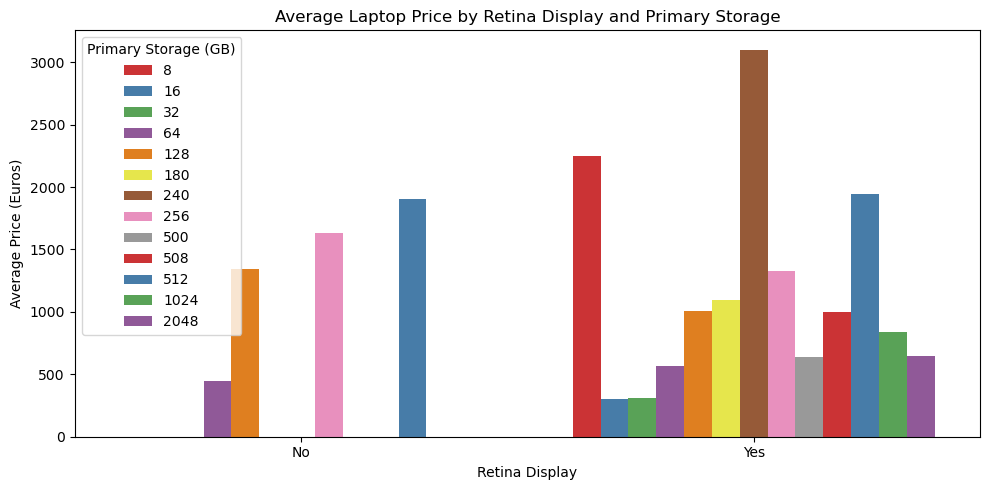

In [52]:
# Price by Retina Display and Primary Storage
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='RetinaDisplay', y='Price_euros', hue='PrimaryStorage', palette='Set1', ci=None)

plt.title('Average Laptop Price by Retina Display and Primary Storage')
plt.xlabel('Retina Display')
plt.ylabel('Average Price (Euros)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Primary Storage (GB)', loc='upper left')
plt.tight_layout()
plt.show()


Laptops with a Retina Display show the highest average prices when paired with 240GB primary storage, followed by those with 512GB. This suggests that even moderate storage sizes combined with Retina technology command a premium. In contrast, laptops without Retina Displays have higher average prices when equipped with 512GB or 256GB storage, indicating that larger storage capacity plays a more significant role in pricing when advanced display technology is absent.



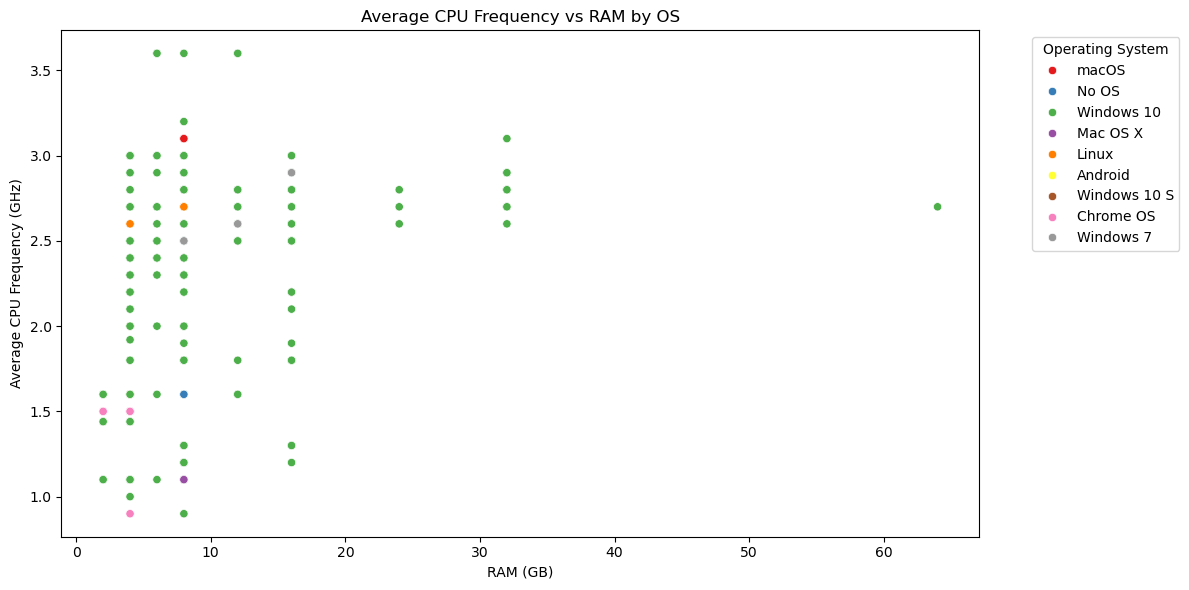

In [53]:
# Average CPU Frequency vs RAM by OS
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Ram', y='CPU_freq', hue='OS', palette='Set1',)

plt.title('Average CPU Frequency vs RAM by OS')
plt.xlabel('RAM (GB)')
plt.ylabel('Average CPU Frequency (GHz)')
plt.legend(title='Operating System', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The scatterplot shows that Windows 10 laptops have a wide range of RAM and CPU frequencies, spanning from budget to high-performance models. MacOS laptops cluster around 10GB of RAM with CPU frequencies consistently above 3 GHz, highlighting their premium hardware focus. Chrome OS devices tend to have lower RAM and CPU frequencies, indicating their positioning in the budget or lightweight device segment. Other operating systems exhibit more varied specifications but generally don’t match the high-end specs of MacOS or the wide range seen in Windows 10.